# Overview
 
### 1. Understand Convolutional Neural Networks (CNN)
### 2. Processing Raw Images
### 3. Convolution versus Dense Layers
### 4. Why MaxPooling?
### 5. Idea Behind using Pre-Trained Networks

# ---------------------------------------------------------------------------

## Start with building a base CNN Model

In [3]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

## Processing raw images to input to neural networks

In [4]:
#read in the data 
from keras.datasets import mnist
from keras.utils import to_categorical

#split data in to train and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Reshape image from 3D to 4D Tensor/ Normalize the data in the range 0 - 1
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

#Repeat for test data
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#One hout encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Use categorical_crossentropy (Multi-Classification Problem)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#Fit model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 58s 961us/step - loss: 0.1780 - acc: 0.9448
Epoch 2/5
60000/60000 [==============================] - 58s 965us/step - loss: 0.0462 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 59s 989us/step - loss: 0.0314 - acc: 0.9905
Epoch 4/5
60000/60000 [==============================] - 56s 936us/step - loss: 0.0252 - acc: 0.9924
Epoch 5/5
60000/60000 [==============================] - 59s 976us/step - loss: 0.0191 - acc: 0.9941


In [5]:
#Evaluate test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 341us/step


0.9881

### Difference between Dense and Conv2D layers?

* Dense layers learn global patterns
* Convolutional layers learn local patterns! (Small 2D windows of 3x3 in this case)

### Advantages of Conv2D :

* Translational Invariant
* Spatial Hierarchies of features

Lets visualize this :

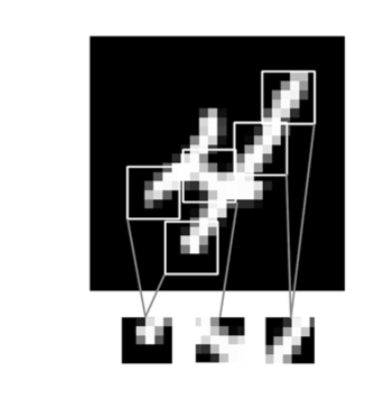

In [6]:
from IPython.display import Image
Image(filename='/Users/samarth/Desktop/Samarth/Data Sets/Deep Learning Scripts/Conv2D.png')

### Now that we understand Conv2D, lets go back and look at the dimensions of the layers

### Inferences :
* First layer computes 32 filters (2-D)

### Convolution layers defined by 2 parameters:
* Size of the patches (3x3 in this case)
* Depth of the output feature map

### Border Effect
* Conv2D layers shrinks a little due to border effect

### Strides

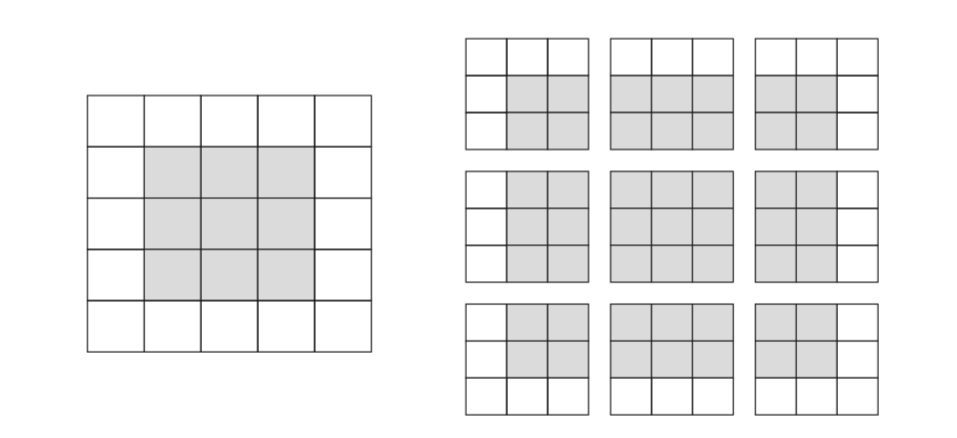

In [7]:
Image(filename='/Users/samarth/Desktop/Samarth/Data Sets/Deep Learning Scripts/strides.png')

## Why Max Pooling?

* Reduce the number of parameters by picking up the max value from the tensor (can use strides too!)
* Not conducive to learn heirarchy of features (why?)

### General Subsampling Strategy : Produce dense map of features -> look at maximal features

# ---------------------------------------------------------------------------------

## Potential Assignment : Apply Covnets to the Cats/Dog dataset for binary classification


# ---------------------------------------------------------------------------------

## Recap preprocessing steps for images :

* Read picture files
* Decode JPEG content to RGB grids of pixels
* Convert to floating point tensors
* Rescale pixel values in the range (0,1)

### Review final output for an image : (20, 150,150, 3)

# ---------------------------------------------------------------------------

## Not covered but might be worth looking in to:

#### Python generators for training images in batches

#### Data Augmentation to prevent overfitting 

#### Use Dropout for images to prevent overfitting

#### Use a Pre-Trained Covnet (VGG16) for better accuracy

# --------------------------------------------------------------------------

## How can I use a pre-trained network? (We will cover this in detail for text)




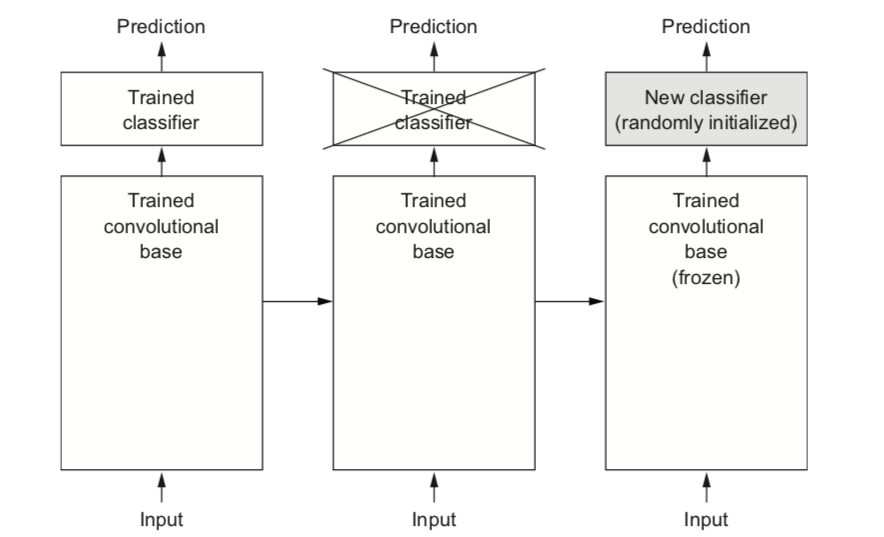

In [8]:
Image(filename='/Users/samarth/Desktop/Samarth/Data Sets/Deep Learning Scripts/pre-train.png')

### Key Idea : Representations in the lower layers will be more generic!

### Use _trainable = false_ parameter in Keras to freeze layers (Re-use weights)

### Use Fine Tuning to unfreeze some top layers to mesure performance (low learning rate!)

# -----------------------------------------------------------------------------------

## Finally, neural network layers are analogous to human learning!!

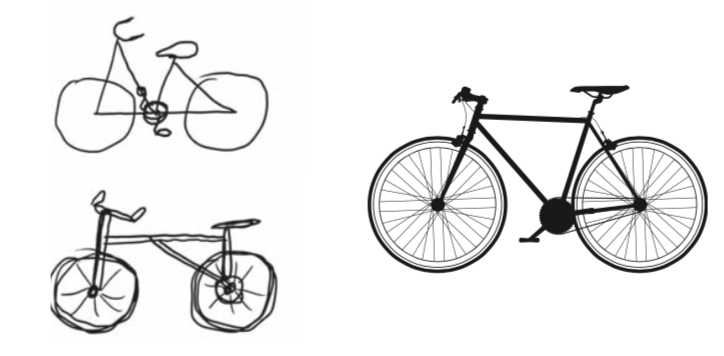

In [12]:
Image(filename='/Users/samarth/Desktop/Samarth/Data Sets/Deep Learning Scripts/human learning.png')